# CS331 - Spring 2022 - Phase 1 [10%]

*__Submission Guidelines:__* 
- Naming convention for submission of this notebook is `groupXX_phase1.ipynb` where XX needs to be replaced by your group number. For example: group 1 would rename their notebook to `group01_phase1.ipynb`
- Only the group lead is supposed to make the submission
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments 

Please note that your notebooks will be checked against submissions from last year's course offering for plagiarism. The university honor code should be maintained. Any violation, if found, will result in disciplinary action.


#### <b>Introduction</b> 
This is the first of the three phases of this offering's project. To give an overview of this phase, we will essentially be building everything from scratch. The datasets that we will be using for this project are the MNIST and the Fashion_MNIST dataset. <b> This notebook will focus on the MNIST dataset. </b> 

The MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples. These examples consist of hand-written digits that belong to ten different classes (numbers 1 through 10). The given images have been size-normalized and centered in a fixed-size image. It would also be highly advisable to go through [this link](http://yann.lecun.com/exdb/mnist/) the information provided in this link to fully understand this dataset.

You will begin by pre-processing the already-loaded dataset in this notebook followed by from-scratch implementation of a Neural Network (NN). Once done, you will have to tweak the hyperparameters (such as learning rate, number of epochs etc.) to get the best results for your NN's implementation

###### <b>You will strictly be using for-loops fort this phase's implementation of NN (unless specified otherwise in the sub-section)

###### Modification of the provided code without prior discussion with the TAs will result in a grade deduction </b>

---

###### <b>Side note</b>
The `plot_model` method will only work if you have the `pydot` python package installed along with [Graphviz](https://graphviz.gitlab.io/download/). If you do not wish to use this then simply comment out the import for `pydot`

###### <b>Need Help?</b>
If you need help, please refer to the course staff ASAP and do not wait till the last moment as they might not be available on very short notice close to deadlines

#### <b>Before You Begin</b>

Skeleton code is provided to get you started. The main methods that you need to implement correspond to the four steps of the training process of a NN which are as follows:
1. Initialize variables and initialize weights
2. Forward pass
3. Backward pass AKA Backpropagation
4. Weight Update AKA Gradient Descent

__Look for comments in the code to see where you are supposed to write your code__ 

A `fit` function is what combines the previous three functions and overall trains the network to __fit__ to the provided training examples. The provided `fit` methods requires all the four steps of the training process to be working correctly. The function has been setup in a way that it expects the above four methods to take particular inputs and return particular outputs. __You are supposed to work within this restriction__ 



__To see if your model is working correctly, you need to make sure that your model loss is going down during training__


In [98]:
# Making all the necessary imports here

import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
import cv2
import glob
from numba import jit
from sklearn.metrics import accuracy_score

In [99]:
# This function will be used to plot the confusion matrix at the end of this notebook

def plot_confusion_matrix(conf_mat):
    classes = ['1','2','3','4','5','6','7','8','9','10']
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

class_labels = ['1','2','3','4','5','6','7','8','9','10']

In [100]:
# Enter group lead's roll number here. This will be used for plotting purposes

rollnumber = 24100006

#### __Loading and Pre-processing the MNIST dataset__

The MNIST dataset has been already loaded using the imported keras APIs. You have to pre-process the given training and testing samples according to the implementation of your NN. It is recommended that you print the given matrices to figure out how to go about pre-processing. 

In [101]:
# Loading the dataset using keras APIs
''' 
x_train = variable to store training images
y_train = variable to store training images' labels
x_test = variable to store test images
y_test = variable to store test images' labels
'''

classes = 10  # do not change this

(x_train,y_train),(x_test,y_test) = mnist.load_data()
# Sizes of test and training samples
print("Size of training samples matrix:", x_train.shape)
print("Size of testing samples matrix:", x_test.shape)

###### Code Here ######
'''Hint: You will have to normalize the given matrices'''
x_train = x_train.reshape(60000, 784)     
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')     
x_test = x_test.astype('float32')     
x_train /= 255    
x_test /= 255

y_train = np_utils.to_categorical(y_train, classes)     
y_test = np_utils.to_categorical(y_test, classes)





print("Number of training sample: ", x_train.shape)
print("Number of testing sample: ", y_train.shape)


Size of training samples matrix: (60000, 28, 28)
Size of testing samples matrix: (10000, 28, 28)
Number of training sample:  (60000, 784)
Number of testing sample:  (60000, 10)


#### __NN Implementation__
Your implementation of NN needs to use the `sigmoid` activation function for the hidden layer(s) and the `softmax` activation function for the output layer. The NN model you will be creating here will consits of only three layers: 1 input layer, 1 hidden layer and 1 output layer

In [102]:
class NeuralNetwork():
    
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        log_pred = np.log(y_pred)

        entLoss = -(y_true * log_pred).sum()

        return entLoss
    
    @staticmethod
    def accuracy(y_pred, y_true):



        acDet = np.sum(y_pred == y_true)
        shapePredY = y_pred.shape[0]
        return acDet/shapePredY
    
    @staticmethod
    def softmax(x):
        ###### Code Here ######


        exponent = np.exp(x)
        return (exponent / exponent.sum(axis=1, keepdims=True))
        
    
    @staticmethod
    def sigmoid(x):
        ###### Code Here ######

        relBel = (1 + np.exp(-x))
        sig = (1/relBel)
        return sig
    
    def __init__(self, input_size, hidden_nodes, output_size):
        '''Creates a Feed-Forward Neural Network.
        The parameters represent the number of nodes in each layer (total 3). 
        Look at the inputs to the function'''
        
        self.layers_number = 3
        self.in_shape = input_size
        self.hid_shape = hidden_nodes
        self.out_shape = output_size
        
        self.weights = []
        self.biases = []
        self.__init_weights()
    
    def __init_weights(self):
        '''Initializes all weights based on standard normal distribution and all biases to 0.'''
        
        ###### Code Here (Replace 'None' by appropriate values/variables) ######
        Weights_h = np.random.normal(size=(self.in_shape, self.hid_shape))
        biases_h = np.zeros(shape=(self.hid_shape,))

        Weight_o = np.random.normal(size=(self.hid_shape, self.out_shape))
        biases_o = np.zeros(shape=(self.out_shape,))
        
        # self.weights becomes a list of np.arrays. 0th index has Weights_h and 1st index has Weight_o
        self.weights.append(Weights_h)  
        self.weights.append(Weight_o)  

        # self.biases becomes a list of np.arrays. 0th index has biases_h and 1st index has biases_o
        self.biases.append(biases_h)
        self.biases.append(biases_o)

    @jit
    def matSum(self, matrix, axe=None):
      if axe != 1:

        cen = matrix.shape[1]
        right = matrix.shape[0]
        
        result_list = []
        cSt = 0
        for i in range(cen):
          addition = 0
          for j in range(right):
            addition = addition + matrix[j][i]
          result_list.append(addition)
          cSt += 1

        
      if axe == 1:
        cen = matrix.shape[1]

        right = matrix.shape[0]
        
        result_list = []
        cSt = 0
        for i in range(right):
          addition = 0
          for j in range(cen):
            addition = addition + matrix[i][j]
          result_list.append(addition)
          cSt += 1
      
      return np.array(result_list)
  

    @jit
    def subtMat(self, matrix_one, matrix_two):
      right = matrix_one.shape[0]
      cent = matrix_one.shape[1]
      subted = np.zeros((right, cent))

      for i in range(right):
        for j in range(cent):
          subted[i][j] = matrix_one[i][j] - matrix_two[i][j]
      return subted

    @jit
    def elWise(self, matrix_one, matrix_two):
      right = matrix_one.shape[0]
      cent = matrix_one.shape[1]
      result = np.zeros((right, cent))

      for i in range(right):
        for j in range(cent):
          result[i][j] = matrix_one[i][j] * matrix_two[i][j]
      return result
    
    @jit
    def scalSub(self, matrix, constant):
      lr = matrix.shape[0]
      c = matrix.shape[1]
      result = np.zeros((lr, c))

      for i in range(lr):
        for j in range(c):
          result[i][j] = constant - matrix[i][j]
      return result

    @jit
    def scalMul(self, matrix, constant):
      r = matrix.shape[0]
      c = matrix.shape[1]
      result = np.zeros((r, c))

      for i in range(r):
        for j in range(c):
          result[i][j] = matrix[i][j] * constant
      return result

    @jit
    def matMul(self, matrix_one, matrix_two):
      rightO = matrix_one.shape[0]
      

      ceeO = matrix_one.shape[1]
      ceeT = matrix_two.shape[1]

      result = np.zeros((rightO, ceeT))

      for i in range(rightO):
        for j in range(ceeT):
          for k in range(ceeO):
            result[i][j] += matrix_one[i][k] * matrix_two[k][j]
      return result


    def forward_pass(self, input_data):
        '''Executes the feed forward algorithm.
        "input_data" is the input to the network in row-major form
        Returns "Acts", which is a list of all layer outputs (excluding input layer of course)'''

     
        Acts = self.matMul(input_data, self.weights[0])
        lenBi = len(self.biases[0])
        for i in range(lenBi):
          Acts[0][i] += self.biases[0][i]
        hidActs = self.sigmoid(Acts)
        Acts = self.matMul(hidActs, self.weights[1])
        lenBi2 = len(self.biases[1])
        for i in range(lenBi2):
          Acts[0][i] += self.biases[1][i] 
        oActs = self.softmax(Acts)
        return [hidActs, oActs]

    def backward_pass(self, targets, layer_Acts):
        '''Executes the backpropogation algorithm.
        "targets" is the ground truth/labels
        "layer_Acts" are the return value of the forward pass step
        Returns "delts", which is a list containing weight update values for all layers (excluding the input layer of course)'''
        
        delts = []
        dOdE = self.subtMat(layer_Acts[1], targets)
        dIdE = dOdE
        delts.append(dIdE)
        dOdE = self.matMul(dIdE, self.weights[1].T)     
        dOutput_dInput = self.elWise(layer_Acts[0], self.scalSub(layer_Acts[0], 1))
        dIdE = self.elWise(dOutput_dInput, dOdE)
        delts.append(dIdE)
        
        return delts
    
    def weight_update(self, delts, layer_inputs, lr):
        '''Executes the gradient descent algorithm.
        "delts" is return value of the backward pass step
        "layer_inputs" is a list containing the inputs for all layers (including the input layer)
        "lr" is the learning rate'''
        dWDi = layer_inputs[0]
        dEdW = self.matMul(dWDi.T, delts[1])
        self.weights[0] = self.subtMat(self.weights[0], self.scalMul(dEdW, lr))
        tempVar = lr * self.matSum(delts[1], 0)
        for i in range(len(self.biases[0])):
          self.biases[0][i] -= tempVar[i]
        dWDi = layer_inputs[1]
        dEdW = self.matMul(layer_inputs[1].T, delts[0])
        self.weights[1] = self.subtMat(self.weights[1], self.scalMul(dEdW, lr))
        tempVar = lr * self.matSum(delts[0], 0)
        for i in range(len(self.biases[1])):
          self.biases[1][i] -= tempVar[i]
    
    
    ###### Do Not Change Anything Below this line in This Cell ######
    
    def fit(self, Xs, Ys, epochs, lr=1e-3):
            history = []
            for epoch in tqdm_notebook(range(epochs)):
                num_samples = Xs.shape[0]
                for i in range(num_samples):

                    sample_input = Xs[i,:].reshape((1,self.in_shape))
                    sample_target = Ys[i,:].reshape((1,self.out_shape))
                    
                    Acts = self.forward_pass(sample_input)   # Call forward_pass function 
                    delts = self.backward_pass(sample_target, Acts)    # Call backward_pass function 
                    layer_inputs = [sample_input] + Acts[:-1]
                    
                    # Call weight_update function 
                    self.weight_update(delts, layer_inputs, lr)
                
                preds = self.predict(Xs)   # Call predict function 

                current_loss = self.cross_entropy_loss(preds, Ys)
                
                if  epoch==epochs-1:
                  confusion_mat=confusion_matrix(Ys.argmax(axis=1), preds.argmax(axis=1),labels=np.arange(10))  
                  plot_confusion_matrix(confusion_mat)
                  report = classification_report(Ys, np_utils.to_categorical(preds.argmax(axis=1),num_classes=classes), target_names=class_labels)
                  print(report)
                history.append(current_loss)
            return history
    
    def predict(self, Xs):
        '''Returns the model predictions (output of the last layer) for the given "Xs".'''
        predictions = []
        num_samples = Xs.shape[0]
        for i in range(num_samples):
            sample = Xs[i,:].reshape((1,self.in_shape))
            sample_prediction = self.forward_pass(sample)[-1]
            predictions.append(sample_prediction.reshape((self.out_shape,)))
        return np.array(predictions)
    
    def evaluate(self, Xs, Ys):
        '''Returns appropriate metrics for the task, calculated on the dataset passed to this method.'''
        pred = self.predict(Xs)
        return self.cross_entropy_loss(pred, Ys), self.accuracy(pred.argmax(axis=1), Ys.argmax(axis=1))
    
    def plot_model(self, filename):
        '''Provide the "filename" as a string including file extension. Creates an image showing the model as a graph.'''
        graph = pydot.Dot(graph_type='digraph')
        graph.set_rankdir('LR')
        graph.set_node_defaults(shape='circle', fontsize=0)
        nodes_per_layer = [self.in_shape, self.hid_shape, self.out_shape]
        for i in range(self.layers_number-1):
            for n1 in range(nodes_per_layer[i]):
                for n2 in range(nodes_per_layer[i+1]):
                    edge = pydot.Edge(f'l{i}n{n1}', f'l{i+1}n{n2}')
                    graph.add_edge(edge)
        graph.write_png(filename)

In [103]:
# These are what we call the hyperparameters (a.k.a Black Magic). You need to research on them and tweak them to see what generates the best result for you 

INPUT_SIZE = 784      # must be an int, this number represents the numeber of nodes/neurons in the input layer of the network
HIDDEN_NODES = 400     # must be an int, this number represents the numeber of nodes/neurons in the only hidden layer of the network
OUTPUT_SIZE = 10      # must be an int, this number represents the numeber of nodes/neurons in the output layer of the network
EPOCH = 3        # must be an int
LEARNING_RATE = 0.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:222: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-102-2c4dc13695b6>:147: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "matMul" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-102-2c4dc13695b6> (149)

File "<ipython-input-102-2c4dc13695b6>", line 149:
    def matMul(self, matrix_one, matrix_two):
      rightO = matrix_one.shape[0]
      ^

  @jit
<ipython-input-102-2c4dc13695b6>:147: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "matMul" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-102-2c4dc13695b6>", line 157:
    def matMul(self, matrix_one, matrix_two):
        <source elided>

      for i in range(rightO):
      ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "matMul" was compiled in object mode without forceobj=Tr

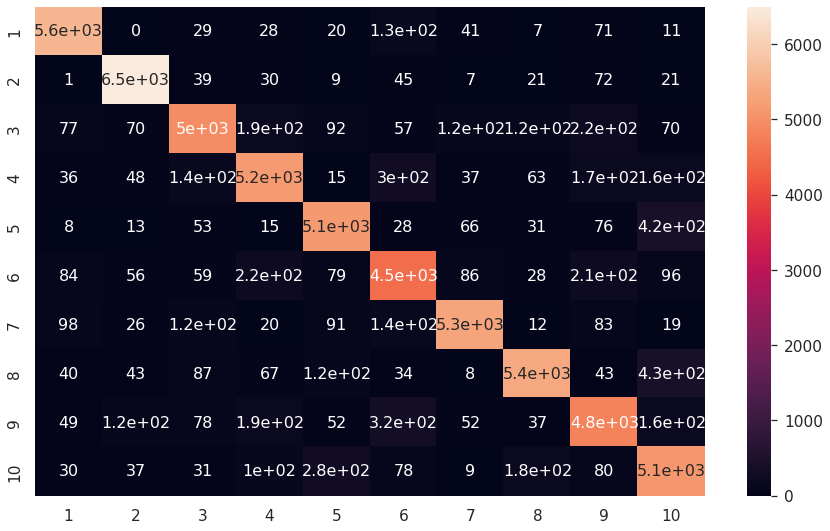

              precision    recall  f1-score   support

           1       0.93      0.94      0.94      5923
           2       0.94      0.96      0.95      6742
           3       0.89      0.83      0.86      5958
           4       0.86      0.84      0.85      6131
           5       0.87      0.88      0.87      5842
           6       0.80      0.83      0.81      5421
           7       0.93      0.90      0.91      5918
           8       0.91      0.86      0.89      6265
           9       0.82      0.82      0.82      5851
          10       0.79      0.86      0.82      5949

   micro avg       0.87      0.87      0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.88      0.87      0.87     60000
 samples avg       0.87      0.87      0.87     60000

Runtime of the algorithm is  1148.058  seconds


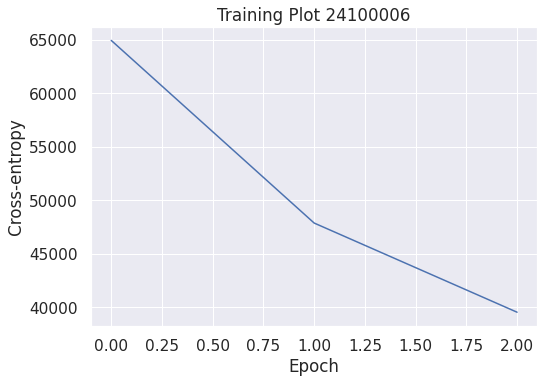

In [104]:
start = time.time()

nn = NeuralNetwork(input_size = INPUT_SIZE, hidden_nodes = HIDDEN_NODES, output_size = OUTPUT_SIZE)
history = nn.fit(x_train, y_train, epochs=EPOCH, lr=LEARNING_RATE)
plt.plot(history);
plt.gca().set(xlabel='Epoch', ylabel='Cross-entropy', title='Training Plot {}'.format(rollnumber));
end = time.time()

print("Runtime of the algorithm is ", round((end - start),3)," seconds")

In [105]:
nn.evaluate(x_test, y_test)

(7283.293986603909, 0.8657)